# Результаты проведения A/B теста для проекта "Tochno"

Изначально были сформулированы 2 цели, от которых мы отталкивались:

1. Увеличить сумму ежемесячных пожертвований на «Если быть точным» до 60 000 рублей.
2. Увеличить количество заявок на верификацию НКО до 32.

В конечном итоге для проекта важно, чтобы пользователи возвращались ежемесячно, т.е. окончательная цель - 
### увеличить retention, **возвращаемость пользователей каждый месяц**.

По данным за последние три месяца мы увидели следующую картину:

1. Средний bounce-rate (процент отказов) составляет более 16%
2. Средняя возвращаемость 4-й недели составляет 0.66%
3. Пользователи просматривают около 3 страниц за посещение и тратят на сессию около 2 минут.
4. Пользователи, которые переходят на сайт из email-рассылок, просматривают в среднем более 4 страниц за посещение.
5. Текущая конверсия пользователя в подписку составляет 0.85%

Краткосрочно можно повлиять только на **метрику с конверсией в подписку на email**. \
На возвращаемость значительно влияют новые разделы, а через email можно информировать большее количество людей об их появлении.\
Таким образом, рассылки напрямую влияют на retention, и главной нашей целью будет **перевести как можно больше посетителей сайта в подписчиков**.

Был продуман дизайн и улучшены формулировки на сайте, которе должны способствовать конверсии в подписку.\
В качестве инструмента был выбран Google Optimize. \
В качестве метрики была выбрана **конверсия из посещения в подписку**. Нас интересовал прирост в 150% по отношению к текущему значению метрики.\
Из расчёта текущей конверсии 0.85% и её увеличении на 150% нам нужны были минимум 1000 пользователей и 2 недели на тестирование.

По прошествии двух недель мы проанализировали данные и проделали следующие шаги:

### 1. Вычислили отношение конверсии тестовой группы к контрольной
(ниже представлен код, с помощью которого мы провели вычисления)

In [1]:
# Импортируем данные
import pandas as pd
data = pd.read_csv('PA_15_ab_test_results.csv')

In [2]:
# Создадим отдельные датафреймы тестовой и контольной групп
test_df = data[data['Group Type'] == 'test']
control_df = data[data['Group Type'] == 'control']

In [3]:
# Вычислим конверсию тестовой группы, контрольной группы и выведем отношение конверсии тестовой группы к контрольной
test_CR = test_df['Email Subscriptions'].sum()/test_df['Users'].sum()
control_CR = control_df['Email Subscriptions'].sum()/control_df['Users'].sum()
test_CR/control_CR

2.5310635457086827

### Конверсия тестовой группы больше конверсии контрольной группы в 2,5 раза!

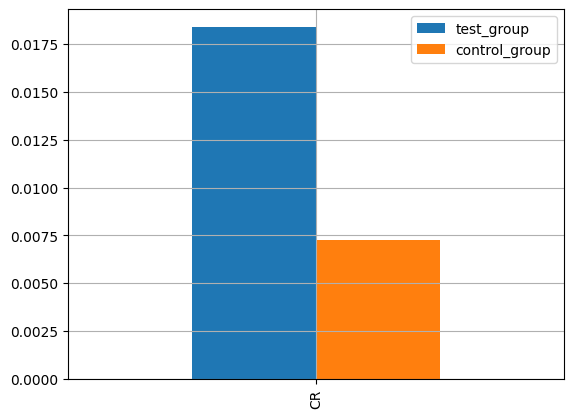

In [4]:
# Выведем на диаграмме величину конверсий тестовой и контрольной групп для наглядности
CR_df = pd.DataFrame(
    data = [[test_CR,control_CR]],
    columns= ['test_group', 'control_group'],
    index=['CR']
)
CR_df.plot(kind='bar', grid=True);

Также представим на графике динамику конверсии тестовой и контрольной групп по дням

In [5]:
data['CR'] = data['Email Subscriptions']/data['Users']
test_df = data[data['Group Type'] == 'test'][['Day Index', 'CR']]
control_df = data[data['Group Type'] == 'control'][['Day Index', 'CR']]
CR_dynamic = test_df.merge(
    control_df,
    on='Day Index',
    how='inner'

)
CR_dynamic.columns = ['date','test', 'control']

In [6]:
import plotly
import plotly.express as px

fig = px.line(
    data_frame=CR_dynamic, #датафрейм
    x='date', #ось абсцисс
    y=['test', 'control'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='CR тестовой и контрольной группы в динамике' #заголовок
)
fig.show()


Мы видим на графике, что за период теста показатели конверсии контрольной группы лишь один раз незначительно превысили показатели конверсии тестовой группы,\
большую часть времени они были хуже.

### 2. Вычислили статистическую значимость полученной разницы в конверсиях с помощью Z-test для пропорций

In [7]:
# Установим уровень значимости alfa на уровне 0.05
alfa = 0.05

In [8]:
# Вычислим значения статистики и p_value с помощью z-test для пропорций
from statsmodels.stats.proportion import proportions_ztest

count = [data[data['Group Type']=='test']['Email Subscriptions'].sum(), data[data['Group Type']=='control']['Email Subscriptions'].sum()]
nobs = [data[data['Group Type']=='test']['Users'].sum(), data[data['Group Type']=='control']['Users'].sum()]

statistic, p_value = proportions_ztest(count,nobs)
print(f'statistic: {statistic}')
print(f'p_value: {p_value}')


statistic: 3.5147000645234394
p_value: 0.00044025091667789374


In [9]:
# Проверим, является ли разница статистически значимой:
p_value < alfa

True

P-value оказалось меньше уровня значимости 0.05, значит, разница действительно является статистически значимой!

### 3. Вычислили 95% доверительный интервал для полученного значения конверсии тестовой группы.

Мы ввели в калькулятор https://sample-size.net/confidence-interval-proportion/ следующие данные:

N (количество пользователей) = 2663\
x (количество подписок) = 49\
CL (confidence level) = 95.

Получили следующие значения:

Proportion of positive results = P = x/N = 0.0184\
Lower bound = 0.0136\
Upper bound = 0.0243

## Общие выводы:

 1. Тест успешен. Конверсия тествовой группы больше конверсии контрольной группы в **2,5 раза**
 2. В рамках Z-test для пропорций было подтверждено, что разница является статистически значимой.
 3. В рамках 95% доверительного интервала значение конверсии тестовой группы ожидается в пределах 0.0136 - 0.0243. \
 Если перевести в проценты - в пределах 1.36 - 2.43, что значительно выше текущих показателей конверсии в 0.85%.

### Рекомендуется масштабировать эксперимент на всю аудиторию. 